In [3]:
import pandas

df = pandas.read_csv("CameronData.csv")

In [4]:
df.head()

Index                                            Posting    PosterName  \
0      1   √∞≈∏≈í≈∏ Celebrating Entrepreneurship & Economic ...  CameronR.Law   
1      2   Join us for an early Global Entrepreneurship ...  CameronR.Law   
2      3   Exciting News! Global Entrepreneurship Week S...  CameronR.Law   
3      4   We just learned of this last-minute opportuni...  CameronR.Law   
4      5   √∞≈∏≈°‚Ç¨ Don't Miss the Mentor Sprint during Glob...  CameronR.Law   

  PostingDate  NumberofLikes  NumberofComments  NumberofReposts  \
0   11/2/2023             12                 3                1   
1   11/2/2023             11                 3                2   
2   11/1/2023              7                 0                4   
3   11/1/2023              4                 1                2   
4  10/31/2023              5                 0                3   

   NumberofOrganicImpressions  \
0                          98   
1                         342   
2                         109   
3                           0   
4                          45   

                                            Comments  \
0  What a great news for the Greater Sacramento S...   
1  An amazing opportunity! I look forward to seei...   
2                                                NaN   
3  Thanks for the post! Applications are due toni...   
4                                                NaN   

                                          Commenters  
0  Dick Gourley, Cameron Law, Carlsen Center for ...  
1               Cameron Law, Kwame Anku, Mark Takata  
2                                                NaN  
3                                        TigerLaunch  
4                                                NaN

In [5]:
df.columns

Index(['Index', 'Posting', 'PosterName', 'PostingDate', 'NumberofLikes',
       'NumberofComments', 'NumberofReposts', 'NumberofOrganicImpressions',
       'Comments', 'Commenters'],
      dtype='object')

In [6]:
import pandas as pd

# Check for missing values in each column
print(df.isnull().sum())

Index                          0
Posting                        0
PosterName                     0
PostingDate                    0
NumberofLikes                  0
NumberofComments               0
NumberofReposts                0
NumberofOrganicImpressions     0
Comments                      39
Commenters                    41
dtype: int64


In [7]:
# If you decide to fill in missing values with a placeholder:
df_filled = df.fillna({'Comments': 'No comment', 'Commenters': 'Anonymous'})

In [8]:
df_filled.head()

Index                                            Posting    PosterName  \
0      1   √∞≈∏≈í≈∏ Celebrating Entrepreneurship & Economic ...  CameronR.Law   
1      2   Join us for an early Global Entrepreneurship ...  CameronR.Law   
2      3   Exciting News! Global Entrepreneurship Week S...  CameronR.Law   
3      4   We just learned of this last-minute opportuni...  CameronR.Law   
4      5   √∞≈∏≈°‚Ç¨ Don't Miss the Mentor Sprint during Glob...  CameronR.Law   

  PostingDate  NumberofLikes  NumberofComments  NumberofReposts  \
0   11/2/2023             12                 3                1   
1   11/2/2023             11                 3                2   
2   11/1/2023              7                 0                4   
3   11/1/2023              4                 1                2   
4  10/31/2023              5                 0                3   

   NumberofOrganicImpressions  \
0                          98   
1                         342   
2                         109   
3                           0   
4                          45   

                                            Comments  \
0  What a great news for the Greater Sacramento S...   
1  An amazing opportunity! I look forward to seei...   
2                                         No comment   
3  Thanks for the post! Applications are due toni...   
4                                         No comment   

                                          Commenters  
0  Dick Gourley, Cameron Law, Carlsen Center for ...  
1               Cameron Law, Kwame Anku, Mark Takata  
2                                          Anonymous  
3                                        TigerLaunch  
4                                          Anonymous

# What is the engagement level of my LinkedIn posts and updates? Analyze the descriptive statistics regarding likes, comments, and shares.

In [9]:
# Calculate descriptive statistics for engagement-related columns
engagement_stats = df[['NumberofLikes', 'NumberofComments', 'NumberofReposts']].describe()

# You can print or view the statistics to analyze the engagement levels
print(engagement_stats)

       NumberofLikes  NumberofComments  NumberofReposts
count      84.000000         84.000000        84.000000
mean       11.833333          1.654762         2.642857
std        14.027369          3.931627         2.595839
min         0.000000          0.000000         0.000000
25%         5.000000          0.000000         1.000000
50%         9.000000          1.000000         2.000000
75%        13.250000          2.000000         3.250000
max       108.000000         33.000000        10.000000


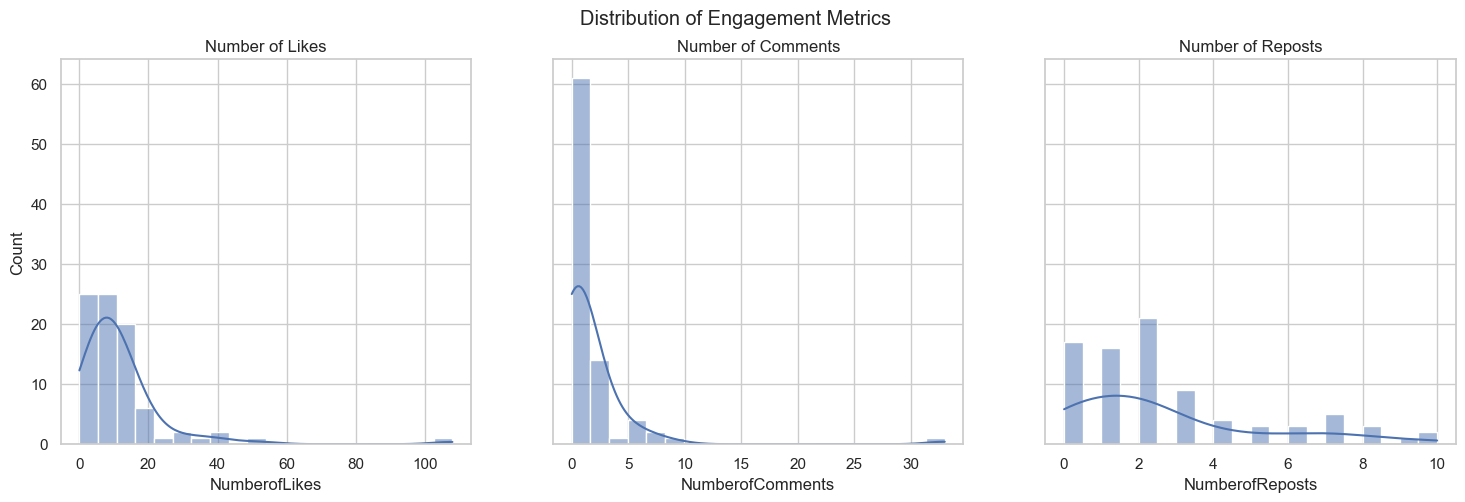

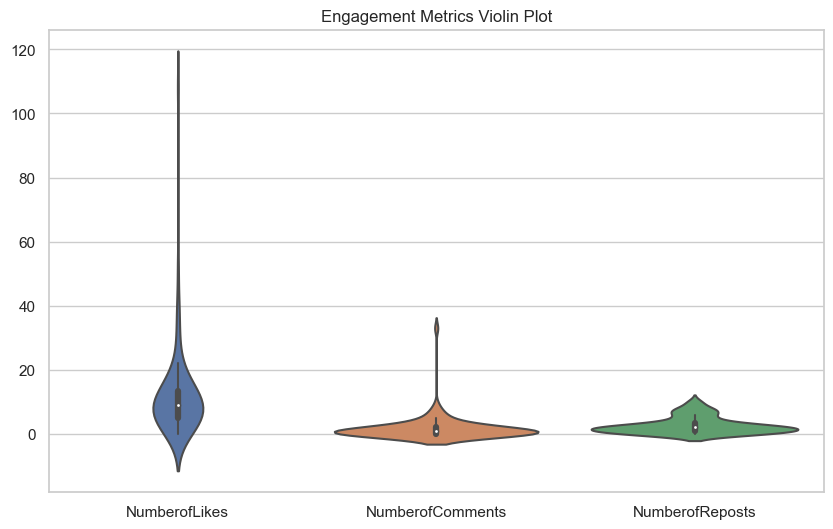

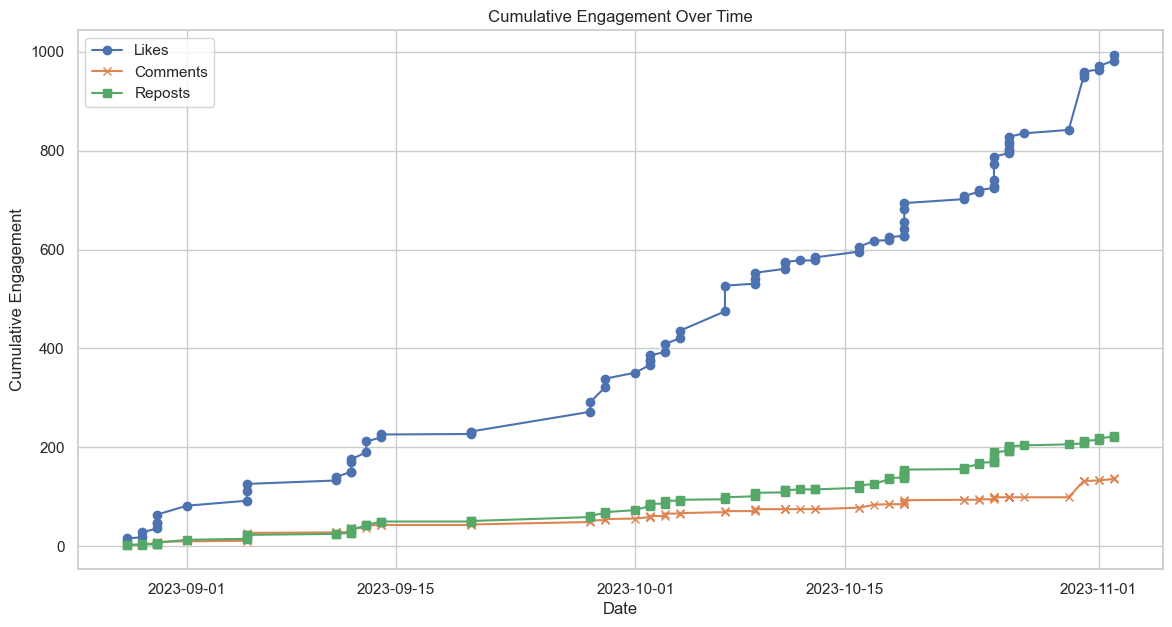

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Histograms for distribution of likes, comments, and reposts
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
fig.suptitle('Distribution of Engagement Metrics')

# Likes distribution
sns.histplot(df['NumberofLikes'], ax=axes[0], bins=20, kde=True)
axes[0].set_title('Number of Likes')

# Comments distribution
sns.histplot(df['NumberofComments'], ax=axes[1], bins=20, kde=True)
axes[1].set_title('Number of Comments')

# Reposts distribution
sns.histplot(df['NumberofReposts'], ax=axes[2], bins=20, kde=True)
axes[2].set_title('Number of Reposts')

plt.show()

# Violin plots for likes, comments, and reposts to show distribution and identify outliers
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(data=df[['NumberofLikes', 'NumberofComments', 'NumberofReposts']], ax=ax)
ax.set_title('Engagement Metrics Violin Plot')
plt.show()

# Line plot for engagement metrics over time if the data is time-series
# Convert PostingDate to datetime
df['PostingDate'] = pd.to_datetime(df['PostingDate'])
df.sort_values('PostingDate', inplace=True)

# Create a cumulative sum of likes, comments, and reposts to see the trend
df['CumulativeLikes'] = df['NumberofLikes'].cumsum()
df['CumulativeComments'] = df['NumberofComments'].cumsum()
df['CumulativeReposts'] = df['NumberofReposts'].cumsum()

fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(df['PostingDate'], df['CumulativeLikes'], label='Likes', marker='o')
ax.plot(df['PostingDate'], df['CumulativeComments'], label='Comments', marker='x')
ax.plot(df['PostingDate'], df['CumulativeReposts'], label='Reposts', marker='s')
ax.set_title('Cumulative Engagement Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Engagement')
ax.legend()

plt.show()

In [11]:
df_filled

Index                                            Posting    PosterName  \
0       1   √∞≈∏≈í≈∏ Celebrating Entrepreneurship & Economic ...  CameronR.Law   
1       2   Join us for an early Global Entrepreneurship ...  CameronR.Law   
2       3   Exciting News! Global Entrepreneurship Week S...  CameronR.Law   
3       4   We just learned of this last-minute opportuni...  CameronR.Law   
4       5   √∞≈∏≈°‚Ç¨ Don't Miss the Mentor Sprint during Glob...  CameronR.Law   
..    ...                                                ...           ...   
79     80   Networking and hanging with StartupSac  and t...  CameronR.Law   
80     81   Ô£ø√º√∂√Ñ Starting soon be sure to register before...  CameronR.Law   
81     82   Calling all innovators, founders, and dreamer...  CameronR.Law   
82     83   Unlock the Power of OKRs: Drive Focus, Alignm...  CameronR.Law   
83     84   Ô£ø√º√•√º Embrace the Spirit of Innovation & Entre...  CameronR.Law   

   PostingDate  NumberofLikes  NumberofComments  NumberofReposts  \
0    11/2/2023             12                 3                1   
1    11/2/2023             11                 3                2   
2    11/1/2023              7                 0                4   
3    11/1/2023              4                 1                2   
4   10/31/2023              5                 0                3   
..         ...            ...               ...              ...   
79   8/30/2023             17                 3                2   
80   8/29/2023              2                 0                0   
81   8/29/2023             10                 1                1   
82   8/28/2023              5                 0                0   
83   8/28/2023             11                 3                3   

    NumberofOrganicImpressions  \
0                           98   
1                          342   
2                          109   
3                            0   
4                           45   
..                         ...   
79                          70   
80                          37   
81                         153   
82                          85   
83                        1229   

                                             Comments  \
0   What a great news for the Greater Sacramento S...   
1   An amazing opportunity! I look forward to seei...   
2                                          No comment   
3   Thanks for the post! Applications are due toni...   
4                                          No comment   
..                                                ...   
79  I missed it. I bet it was good, next month!, S...   
80                                         No comment   
81                         I'm looking forward to it!   
82                                         No comment   
83  We're looking forward to the Startup Challenge...   

                                           Commenters  
0   Dick Gourley, Cameron Law, Carlsen Center for ...  
1                Cameron Law, Kwame Anku, Mark Takata  
2                                           Anonymous  
3                                         TigerLaunch  
4                                           Anonymous  
..                                                ...  
79  Mari-Lyn Harris, Franklin Burris, Carlsen Cent...  
80                                          Anonymous  
81                                         Laura Good  
82                                          Anonymous  
83   StartupSac, Startup Challenge, Startup Challenge  

[84 rows x 10 columns]

# Who are the most influential connections in my network? Identify individuals with a large following or high engagement rates who may be valuable for networking or collaboration.

In [12]:
pd.set_option('display.max_rows', None)
df_filled['Commenters']

0     Dick Gourley, Cameron Law, Carlsen Center for ...
1                  Cameron Law, Kwame Anku, Mark Takata
2                                             Anonymous
3                                           TigerLaunch
4                                             Anonymous
5     Cameron Law,Ethan Bradley, Ethan  Bradley, Ste...
6                                             Anonymous
7                                             Anonymous
8                                             Anonymous
9                                             Anonymous
10                                            Anonymous
11                                            Anonymous
12                                            Anonymous
13                                            Anonymous
14                                            Anonymous
15                                            Anonymous
16    Isaac Brown,Carsen Center of Innovation & Entr...
17                                            An

# How has my network expanded through influential connections? Analyze the growth of your network after connecting with influential individuals.

In [13]:
df = df_filled.sort_values(by='PostingDate', ascending=True)

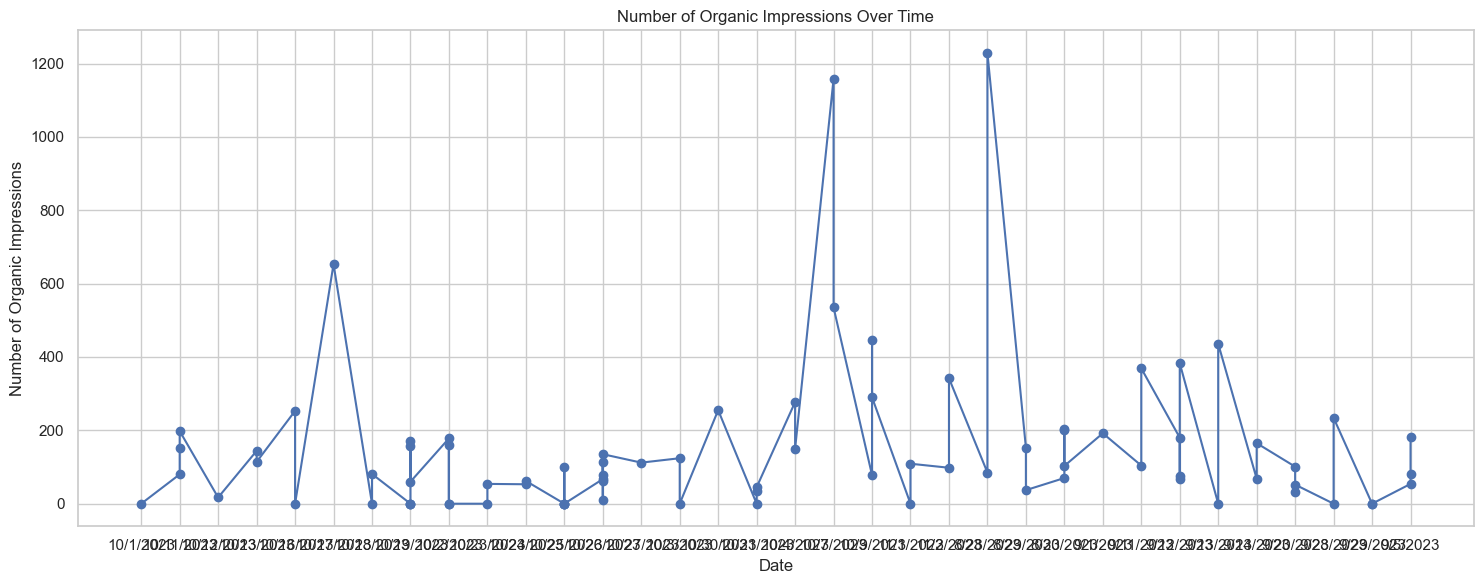

In [18]:
# Line plot of 'NumberofOrganicImpressions' over time

plt.figure(figsize=(15, 6))  
plt.plot(df['PostingDate'], df['NumberofOrganicImpressions'], marker='o')  # Plot with circle markers

plt.title('Number of Organic Impressions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Organic Impressions')

plt.tight_layout()
plt.show()

In [20]:
df_highest_impressions = df_filled.sort_values(by='NumberofOrganicImpressions', ascending=False)
df_highest_impressions

Index                                            Posting       PosterName  \
83     84   Ô£ø√º√•√º Embrace the Spirit of Innovation & Entre...     CameronR.Law   
44     45   #GFX2023 was another tremendous success!  Awe...  ArleneJ.Miranda   
32     33   √∞≈∏≈°‚Ç¨ Ready to create products that customers ...     CameronR.Law   
45     46   The startup ecosystem in the Sacramento regio...     CameronR.Law   
43     44   √∞≈∏≈°‚Ç¨ Ready to turn your business idea into a ...     CameronR.Law   
64     65   √∞≈∏≈í≈∏ Global Entrepreneurship Week Sacramento ...     CameronR.Law   
67     68   The Carlsen Center for Innovation and Entrepr...     CameronR.Law   
71     72  Get ready for a week filled with innovation an...     CameronR.Law   
1       2   Join us for an early Global Entrepreneurship ...     CameronR.Law   
41     42   √∞≈∏≈°‚Ç¨ Calling All Innovators! √∞≈∏≈í≈∏Ready to ign...     CameronR.Law   
46     47   √∞≈∏≈í≈∏ Ready to turn your startup idea into a r...     CameronR.Law   
7       8   √∞≈∏≈°‚Ç¨ From Our Weekly E-Newsletter: Exciting U...     CameronR.Law   
34     35   √∞≈∏≈í≈∏ Carlsen Center Weekly e-Newsletter: Disc...     CameronR.Law   
57     58   √∞≈∏≈°‚Ç¨ Are you ready to take your #startup idea...     CameronR.Law   
77     78   Ô£ø√º√•√º Exciting lineup for our September Innova...     CameronR.Law   
78     79   Join us next Wednesday, Sept. 6th at 10 am PS...     CameronR.Law   
38     39   √∞≈∏≈°‚Ç¨ The Startup Challenge is about to take o...     CameronR.Law   
75     76   Ô£ø√º√∂√Ñ Ready to validate your business ideas li...     CameronR.Law   
74     75   Ô£ø√º√¨¬£ Get ready for a week filled with innovat...     CameronR.Law   
69     70   √∞≈∏≈í≈∏ Dive into the world of web development w...     CameronR.Law   
53     54   √∞≈∏≈°‚Ç¨ Ready to Supercharge Your Innovation Jou...     CameronR.Law   
26     27   √∞≈∏≈°‚Ç¨ Prepare for an Entrepreneurial Revolutio...     CameronR.Law   
62     63   √∞≈∏‚Äù¬ç Unlock the Secrets of Customer Needs wit...     CameronR.Law   
51     52   √∞≈∏≈°‚Ç¨ Innovation, Challenges, and Mentorship: ...     CameronR.Law   
25     26   √∞≈∏≈°‚Ç¨ Ready to turbocharge your startup journe...     CameronR.Law   
81     82   Calling all innovators, founders, and dreamer...     CameronR.Law   
39     40   Are you ready to supercharge your startup's g...     CameronR.Law   
47     48   √∞≈∏‚Äù¬• Join us at GFX - Growth Factory's annual...     CameronR.Law   
36     37   √∞≈∏≈°‚Ç¨ KICKOFF TONIGHT: The Ultimate Startup Ch...     CameronR.Law   
11     12   √∞≈∏≈í≈∏ Get ready for an incredible week of inno...     CameronR.Law   
49     50   √∞≈∏‚ÄúÀÜ Ready to level up your innovation game? ...     CameronR.Law   
10     11   √∞≈∏≈°‚Ç¨ Are you an early-stage entrepreneur with...     CameronR.Law   
35     36   √∞≈∏‚Äú≈° Unlock the Power of Intellectual Propert...     CameronR.Law   
8       9   √∞≈∏‚Äú¬£ Last Call for the Spark Venture Competit...     CameronR.Law   
2       3   Exciting News! Global Entrepreneurship Week S...     CameronR.Law   
70     71   √∞≈∏≈°‚Ç¨ Ready to take your business ideas to the...     CameronR.Law   
76     77   Ô£ø√º√∂√Ñ Whether you're an industry pro, tech ent...  ArleneJ.Miranda   
61     62   Our weekly e-newsletter is here, packed with ...     CameronR.Law   
16     17   Ready to safeguard your innovative ideas? Don...     CameronR.Law   
0       1   √∞≈∏≈í≈∏ Celebrating Entrepreneurship & Economic ...     CameronR.Law   
82     83   Unlock the Power of OKRs: Drive Focus, Alignm...     CameronR.Law   
30     31   √∞≈∏≈°‚Ç¨ Calling all Entrepreneurs! The Spark Ven...     CameronR.Law   
40     41   √∞≈∏‚Äú¬£ Ready to Supercharge Your Capital Strate...     CameronR.Law   
73     74   REMINDER!!! Please join us this Wednesday, Se...     CameronR.Law   
14     15   √∞≈∏≈í≈∏ Get ready for an incredible week of inno...     CameronR.Law   
42     43   √∞≈∏‚Äú¬¢ Exciting Opportunities Await - Check Out...     CameronR.Law   
66     67   √∞≈∏‚Äú¬£ Ready to navi

# What types of content generate the most engagement in my network? Compare and contrasts the characteristics of posts that produce a lot and very little community engagement. What would you recommend me to do in order to improve the current level engagement in the form of number of likes, comments, organic impressions, reposts?

In [21]:
import pandas as pd
from collections import Counter
import re
# Combine all postings into one large text
combined_text = ' '.join(df['Posting'].dropna().values)

# Clean the text by removing special characters and numbers
cleaned_text = re.sub(r'[^A-Za-z\s]', '', combined_text).lower()

# Split the text into words
words = cleaned_text.split()

# Count the frequency of each word
word_counts = Counter(words)

# Remove common English stopwords
stopwords = set(['the', 'and', 'to', 'of', 'a', 'in', 'for', 'is', 'on', 'that', 'with', 'as', 'it', 'are', 'this', 'by', 'be', 'or', 'an', 'from', 'at', 'not', 'we', 'have', 'has', 'was', 'will', 'which', 'can', 'all', 'more', 'our', 'but', 'if', 'about', 'they', 'you', 'their', 'one', 'what', 'also', 'would', 'when', 'other', 'its', 'up', 'there', 'so', 'use', 'out', 'some', 'than', 'like', 'into', 'over', 'after', 'above', 'between', 'may', 'since', 'most', 'often', 'through', 'many', 'much', 'your', 'who', 'them', 'him', 'her', 'just', 'where', 'these', 'because', 'such', 'during', 'being', 'how', 'each'])
filtered_word_counts = {word: count for word, count in word_counts.items() if word not in stopwords and count > 1}

# Get the most common words
most_common_words = Counter(filtered_word_counts).most_common(10)

# Output the 10 most common words, which might represent themes
for word, count in most_common_words:
    print(f'{word}: {count}')

sacramento: 325
innovation: 187
entrepreneurship: 177
startup: 150
growth: 115
business: 91
center: 88
entrepreneurial: 75
chamber: 67
miss: 62


In [22]:
# Define a function to clean the text
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Split the text into words
    words = text.split()
    # Remove stopwords
    stopwords = set(['the', 'and', 'to', 'of', 'a', 'in', 'for', 'is', 'on', 'that', 'with', 'as', 'it', 'are', 'this', 'by', 'be', 'or', 'an', 'from', 'at', 'not', 'we', 'have', 'has', 'was', 'will', 'which', 'can', 'all', 'more', 'our', 'but', 'if', 'about', 'they', 'you', 'their', 'one', 'what', 'also', 'would', 'when', 'other', 'its', 'up', 'there', 'so', 'use', 'out', 'some', 'than', 'like', 'into', 'over', 'after', 'above', 'between', 'may', 'since', 'most', 'often', 'through', 'many', 'much', 'your', 'who', 'them', 'him', 'her', 'just', 'where', 'these', 'because', 'such', 'during', 'being', 'how', 'each'])
    words = [word for word in words if word not in stopwords]
    return words

# Go through each posting, clean the text, and count the words
for index, row in df.iterrows():
    words = clean_text(row['Posting'])
    word_counts = Counter(words)
    most_common_words = word_counts.most_common(5)  # Get the top 5 words for this post
    
    # Print the most common words for this post
    print(f"Post {index}:")
    for word, count in most_common_words:
        print(f'{word}: {count}')
    print("\n")  # Add a new line for readability between posts

Post 54:
startup: 2
got: 1
idea: 1
business: 1
then: 1


Post 40:
growth: 6
startup: 5
startups: 4
capital: 3
strategy: 3


Post 39:
growth: 6
startups: 5
groundwork: 5
fundraising: 4
strategy: 4


Post 38:
startup: 6
sacramento: 6
entrepreneurship: 4
challenge: 3
miss: 3


Post 37:
startup: 4
doing: 3
idea: 3
launch: 2
challenge: 2


Post 36:
startup: 3
ideas: 3
business: 3
tonight: 2
challenge: 2


Post 35:
sacramento: 5
california: 5
intellectual: 4
innovation: 4
james: 4


Post 34:
sacramento: 7
entrepreneurship: 6
innovation: 5
global: 4
week: 4


Post 33:
business: 7
oct: 6
sacramento: 5
davis: 5
pm: 5


Post 32:
customer: 8
products: 6
customers: 5
discovery: 5
create: 4


Post 31:
special: 1
guest: 1
kwame: 1
anku: 1
ceo: 1


Post 30:
sacramento: 10
venture: 5
entrepreneurship: 5
center: 3
innovation: 3


Post 27:
women: 3
part: 2
entrepreneurship: 2
fourthwave: 2
increase: 2


Post 28:
entrepreneurship: 2
women: 2
future: 2
gew: 2
part: 1


Post 29:
weekend: 2
lots: 1
learning

In [24]:
df_highest_impressions

Index                                            Posting       PosterName  \
83     84   Ô£ø√º√•√º Embrace the Spirit of Innovation & Entre...     CameronR.Law   
44     45   #GFX2023 was another tremendous success!  Awe...  ArleneJ.Miranda   
32     33   √∞≈∏≈°‚Ç¨ Ready to create products that customers ...     CameronR.Law   
45     46   The startup ecosystem in the Sacramento regio...     CameronR.Law   
43     44   √∞≈∏≈°‚Ç¨ Ready to turn your business idea into a ...     CameronR.Law   
64     65   √∞≈∏≈í≈∏ Global Entrepreneurship Week Sacramento ...     CameronR.Law   
67     68   The Carlsen Center for Innovation and Entrepr...     CameronR.Law   
71     72  Get ready for a week filled with innovation an...     CameronR.Law   
1       2   Join us for an early Global Entrepreneurship ...     CameronR.Law   
41     42   √∞≈∏≈°‚Ç¨ Calling All Innovators! √∞≈∏≈í≈∏Ready to ign...     CameronR.Law   
46     47   √∞≈∏≈í≈∏ Ready to turn your startup idea into a r...     CameronR.Law   
7       8   √∞≈∏≈°‚Ç¨ From Our Weekly E-Newsletter: Exciting U...     CameronR.Law   
34     35   √∞≈∏≈í≈∏ Carlsen Center Weekly e-Newsletter: Disc...     CameronR.Law   
57     58   √∞≈∏≈°‚Ç¨ Are you ready to take your #startup idea...     CameronR.Law   
77     78   Ô£ø√º√•√º Exciting lineup for our September Innova...     CameronR.Law   
78     79   Join us next Wednesday, Sept. 6th at 10 am PS...     CameronR.Law   
38     39   √∞≈∏≈°‚Ç¨ The Startup Challenge is about to take o...     CameronR.Law   
75     76   Ô£ø√º√∂√Ñ Ready to validate your business ideas li...     CameronR.Law   
74     75   Ô£ø√º√¨¬£ Get ready for a week filled with innovat...     CameronR.Law   
69     70   √∞≈∏≈í≈∏ Dive into the world of web development w...     CameronR.Law   
53     54   √∞≈∏≈°‚Ç¨ Ready to Supercharge Your Innovation Jou...     CameronR.Law   
26     27   √∞≈∏≈°‚Ç¨ Prepare for an Entrepreneurial Revolutio...     CameronR.Law   
62     63   √∞≈∏‚Äù¬ç Unlock the Secrets of Customer Needs wit...     CameronR.Law   
51     52   √∞≈∏≈°‚Ç¨ Innovation, Challenges, and Mentorship: ...     CameronR.Law   
25     26   √∞≈∏≈°‚Ç¨ Ready to turbocharge your startup journe...     CameronR.Law   
81     82   Calling all innovators, founders, and dreamer...     CameronR.Law   
39     40   Are you ready to supercharge your startup's g...     CameronR.Law   
47     48   √∞≈∏‚Äù¬• Join us at GFX - Growth Factory's annual...     CameronR.Law   
36     37   √∞≈∏≈°‚Ç¨ KICKOFF TONIGHT: The Ultimate Startup Ch...     CameronR.Law   
11     12   √∞≈∏≈í≈∏ Get ready for an incredible week of inno...     CameronR.Law   
49     50   √∞≈∏‚ÄúÀÜ Ready to level up your innovation game? ...     CameronR.Law   
10     11   √∞≈∏≈°‚Ç¨ Are you an early-stage entrepreneur with...     CameronR.Law   
35     36   √∞≈∏‚Äú≈° Unlock the Power of Intellectual Propert...     CameronR.Law   
8       9   √∞≈∏‚Äú¬£ Last Call for the Spark Venture Competit...     CameronR.Law   
2       3   Exciting News! Global Entrepreneurship Week S...     CameronR.Law   
70     71   √∞≈∏≈°‚Ç¨ Ready to take your business ideas to the...     CameronR.Law   
76     77   Ô£ø√º√∂√Ñ Whether you're an industry pro, tech ent...  ArleneJ.Miranda   
61     62   Our weekly e-newsletter is here, packed with ...     CameronR.Law   
16     17   Ready to safeguard your innovative ideas? Don...     CameronR.Law   
0       1   √∞≈∏≈í≈∏ Celebrating Entrepreneurship & Economic ...     CameronR.Law   
82     83   Unlock the Power of OKRs: Drive Focus, Alignm...     CameronR.Law   
30     31   √∞≈∏≈°‚Ç¨ Calling all Entrepreneurs! The Spark Ven...     CameronR.Law   
40     41   √∞≈∏‚Äú¬£ Ready to Supercharge Your Capital Strate...     CameronR.Law   
73     74   REMINDER!!! Please join us this Wednesday, Se...     CameronR.Law   
14     15   √∞≈∏≈í≈∏ Get ready for an incredible week of inno...     CameronR.Law   
42     43   √∞≈∏‚Äú¬¢ Exciting Opportunities Await - Check Out...     CameronR.Law   
66     67   √∞≈∏‚Äú¬£ Ready to navi

# What are the trending topics within my network? Identify common themes or keywords in the comments.

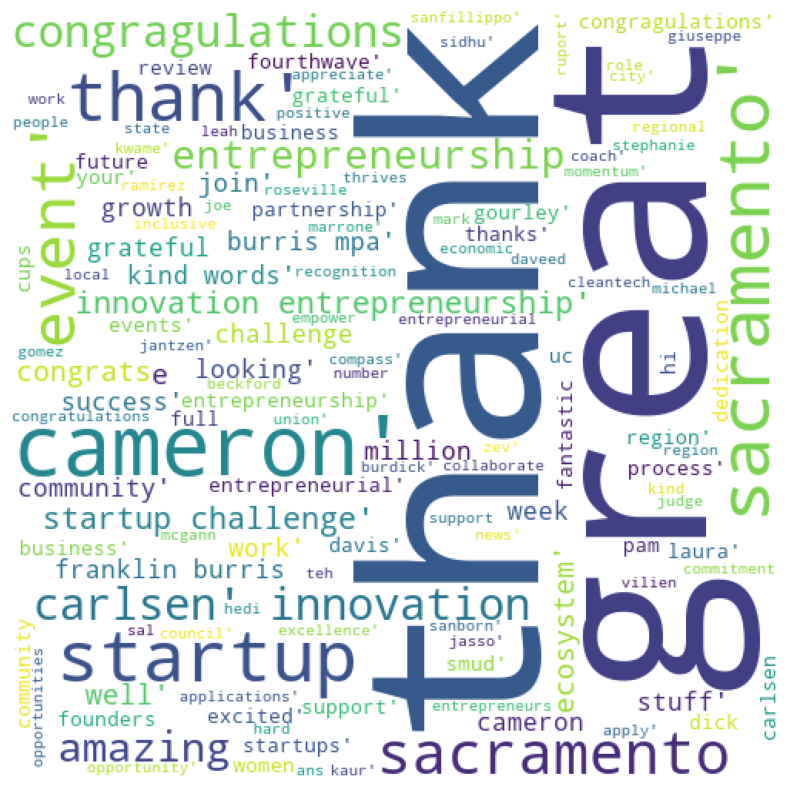

In [27]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import re
from autocorrect import Speller
import unidecode
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords

#Create an empty dataframe
yelp_data_in_dataframe = pandas.DataFrame()
#Put the contents of the csv file into the dataframe
yelp_data_in_dataframe = df_filled

# I created a new dictionary here
yelp_review_dictionary = {}
#I am assinging the post text column data into the dictionary
yelp_review_dictionary = yelp_data_in_dataframe.get('Comments')

# I am converting dictionary to a list so I can analyze the data
yelp_review_list = list(yelp_review_dictionary.values)

#convert text to lower case
yelp_review_list_lowercase = [i.lower() for i in yelp_review_list]

#remove special characters
yelp_review_list_lowercase = [re.sub(r"[^a-zA-Z]", " ", text) for text in yelp_review_list]

CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

reviews = []

for text in yelp_review_list_lowercase:
        string = ""
        for word in text.split(" "):
            if word.strip() in list(CONTRACTION_MAP.keys()):
                string = string + " " + CONTRACTION_MAP[word]
            else:
                string = string + " " + word
        reviews.append(string.strip())

#Remove the stop words or the common words in english from the reviews
stopwords_list = stopwords.words('english')

cleanedreviews=[]
for item in reviews:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        cleanedreviews.append(string)

reviewswithoutlinks=[]
#Remove links
for text in cleanedreviews:
        remove_https = re.sub(r'http\S+', '', text)
        remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
        reviewswithoutlinks.append(remove_com)

#Remove special characters
reviewswithoutlinks = [unidecode.unidecode(text) for text in reviewswithoutlinks]

#Get rid off empty spaces here and there
cleantext = [re.sub(r"\s+"," ",text) for text in reviewswithoutlinks]

#Remove the stop words or the common words in english from the reviews
stopwords_list = stopwords.words('english')

cleanedreviews=[]
for item in reviews:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        cleanedreviews.append(string)

yelp_review_string = ''
for eachletter in  str(cleantext):
    yelp_review_string += eachletter

input = TextBlob(yelp_review_string)

noun_phrases = input.noun_phrases

yelp_review_string = ''
for eachletter in  str(noun_phrases):
    yelp_review_string += eachletter

#World cloud requires a string as input
wordcloud = WordCloud(width = 500, height = 500,
            background_color ='white',
            min_font_size = 10).generate(yelp_review_string)

plt.figure(figsize = (15, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Are there any emerging trends or insights in the industries represented in my posts? Look for patterns in the data both in my posts and user comments. 

In [1]:
import pandas as pd

q7_df = pd.read_csv('/Users/ds/Desktop/LOCAL DRIVE/MSBA/212/GROUP PROJECT/CameronData.csv')

# Convert 'PostingDate' to datetime format
q7_df['PostingDate'] = pd.to_datetime(q7_df['PostingDate'])

# Extract day of the month and day of the week
q7_df['DayOfMonth'] = q7_df['PostingDate'].dt.day
q7_df['DayOfWeek'] = q7_df['PostingDate'].dt.day_name()

# Calculate correlation between 'DayOfMonth' and 'NumberofOrganicImpressions'
correlation_day_of_month = q7_df['DayOfMonth'].corr(q7_df['NumberofOrganicImpressions'])

# Calculate correlation between 'DayOfWeek' and 'NumberofOrganicImpressions'
correlation_day_of_week = q7_df.groupby('DayOfWeek')['NumberofOrganicImpressions'].mean()

# Find the best day of the month
best_day_of_month = q7_df.groupby('DayOfMonth')['NumberofOrganicImpressions'].mean().idxmax()

# Find the best day of the week
best_day_of_week = correlation_day_of_week.idxmax()

# Print the results
print(f"Correlation between Day of the Month and Organic Impressions: {correlation_day_of_month}")
print(f"\nAverage Organic Impressions by Day of the Week:\n{correlation_day_of_week}")
print(f"\nBest Day of the Month for Organic Impressions: {best_day_of_month}")
print(f"\nBest Day of the Week for Organic Impressions: {best_day_of_week}")

Correlation between Day of the Month and Organic Impressions: -0.12762442755262834

Average Organic Impressions by Day of the Week:
DayOfWeek
Friday        93.666667
Monday       218.750000
Saturday     846.500000
Sunday         0.000000
Thursday      93.578947
Tuesday      128.470588
Wednesday    101.869565
Name: NumberofOrganicImpressions, dtype: float64

Best Day of the Month for Organic Impressions: 7

Best Day of the Week for Organic Impressions: Saturday
